# Dados

In [95]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.animation as animation
import numpy as np
import math
from sklearn.datasets import load_iris

In [2]:
breast=pd.read_csv('dados/breast.csv',header=None)
breast=breast.rename(columns={breast.columns[30]:'y'})
breast

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [107]:
iris = load_iris()
df_flowers = pd.DataFrame(iris.data, columns=iris.feature_names)
df_flowers['species'] = iris.target# classe 0 = setosa, classe 1 = versicolor, classe 2 = virginica
df_flowers = df_flowers[['petal length (cm)','petal width (cm)','species']]


df_2flowers = df_flowers.copy()
df_2flowers['species'] = df_flowers['species'].map({0:1, 1:0, 2:0})# Setosa vai ser a classe 1 e as virginicas e versicolor serao agrupadas na classe 0
df_2flowers

,petal length (cm),petal width (cm),species
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


# Normalizador

In [3]:
class Nomalizer:
    def __init__(self):
        self.y_max=0.0
        self.y_min=0.0
        self.x_max=[]
        self.x_min=[]

    def fit(self,x,y):
        # Pega os valores minimos de 
        self.y_max=y['y'].max().tolist()
        self.y_min=y['y'].min().tolist()

        # Pega os valores maximos e minimos do X
        self.x_max=x.max().tolist()
        self.x_min=x.min().tolist()
    
    def normalize(self,x,y):
        y_norm=y.map(self.y_norm_aux)
        x_norm=x.copy()
        norm_index=0
        for column in x.columns:
            x_column=[]
            for i in range(len(x[column])):
                x_column.append((x[column][i]-self.x_min[norm_index])/(self.x_max[norm_index]-self.x_min[norm_index]))
                
            norm_index+=1
            x_norm[column]=x_column    
        
        return x_norm,y_norm
    
    def desnormalize(self,x_norm,y_norm):
        y=y_norm.map(self.y_desnorm_aux)
        x=x_norm.copy()
        norm_index=0
        for column in x_norm.columns:
            x_column=[]
            for i in range(len(x_norm[column])):
                x_column.append((x_norm[column][i]*(self.x_max[norm_index]-self.x_min[norm_index]))+self.x_min[norm_index])
                
            norm_index+=1
            x[column]=x_column    
        
        return x,y
    
    def y_norm_aux(self,y):
        return (y-self.y_min)/(self.y_max-self.y_min)
    
    def y_desnorm_aux(self,y):
        return (y*(self.y_max-self.y_min))+self.y_min

# modelo

In [ ]:
class LogisticClassifier:
  def __init__(self,opt='SGD'):
    self.w =[]
    self.losses=[]
    

  def fit(self, X, y, n, reg, lr=0.001, epochs=100):
    x_poli = self.polinomial_transfomation(X,n)# Transforma em polinomio
    df_bias = pd.DataFrame({'bias':[1]*len(x_poli)})
    X_bias=pd.concat([df_bias,x_poli], axis=1)
    self.w=np.ones(X_bias.shape[1])
    self.fit_SGD(X_bias,y,reg,lr,epochs)

  def polinomial_transfomation(self,x,n):
    df_columns = x.columns
    poli_columns={}
    self.n=n
    x_poli=x.copy()
    for column in df_columns:
      for i in range(2,n+1):
        poli_columns[f"{column}_{i}"] = x[column]**i
    poli_df = pd.DataFrame(poli_columns)
    x_poli = pd.concat([x,poli_df], axis=1)
    return x_poli


  def fit_SGD(self, X, y, reg, lr, epochs):
    for i in range(epochs):
      indices = list(range(len(X)))
      random.shuffle(indices)

      for sample in indices:
        #Calculo dos erros
        y_pred=(X.iloc[sample]*self.w).sum()# esta certo
        y_sig=1 / (1 + np.exp(-y_pred))# esta certo
        error_np=y.iloc[sample]-y_sig# esta certo
        error=error_np.item()#esta certo
        
        #ajuste dos Ws    
        w_arr = np.array(self.w)#esta certo
        inter = lr*error*X.iloc[sample]#esta certo
        w_novo = w_arr + inter#esta certo
        self.w=w_novo
        
        #Calculo da loss
        self.loss_function(X.iloc[sample], y, reg)
        
      
  def sigma(self,x):
    return 1/(1+np.exp(-x))
      
  def loss_function(self, x, y,reg):
    w=np.array(self.w)
    x_arr=x.to_numpy()
    y_arr=y.to_numpy()

    N = len(y_arr)#Numero de amostras
    p = np.dot(x_arr, w)#Produto interno para cada xi
    sigma = 1/(1+np.exp(-p))
    epsilon = 1e-15# sujeira
    sigma = np.clip(sigma, epsilon, 1 - epsilon)# Garante que não ocorra log(0)
    loss = -(1/N)*np.sum(y_arr*np.log(sigma)+(1-y_arr)*np.log(1-sigma)) #Calcula a perda e salva na lista
    self.losses.append(loss)
    

  def predict(self, X):
    y=0
    y_pred=[]# Lista para salvar as predições
    df_bias = pd.DataFrame({'bias':[1]*len(X)})
    x_poli = self.polinomial_transfomation(X,self.n)
    X_bias=pd.concat([df_bias,x_poli], axis=1)
    for sample in range(len(X_bias)):
      y_sigma=self.sigma((X_bias.iloc[sample]*self.w).sum())# Calcula a predição 
      y_pred.append(0 if y_sigma<=0.5 else 1)# Aplica a função degrau para definir a classe e salva na lista
    return y_pred

# Questão 1

In [88]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [165]:
x=breast.iloc[:, 0:30]  
y=breast[['y']]

In [131]:
len(x)

569

/////////////////////////////////////////////////
acuracia do modelo:  0.9736842105263158
revocação do modelo:  0.9859154929577465
precisao do modelo:  0.9722222222222222
f1-score do modelo:  0.979020979020979


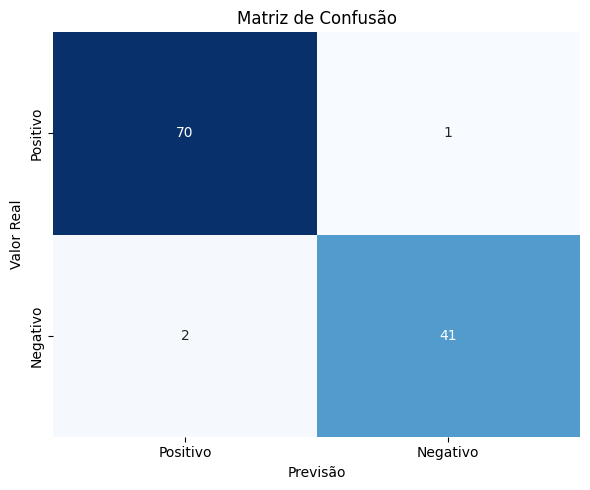

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Normalizando os dados
norm=Nomalizer()
norm.fit(X_train,y_train)
norm_Trx,norm_Try=norm.normalize(X_train,y_train)
norm_Tsx,norm_Tsy=norm.normalize(X_test,y_test)


# Treinando um modelo
model = LogisticClassifier()
model.fit(norm_Trx,y_train,n=1, reg=1, lr=0.1, epochs=100)

# Fazendo previsões
y_pred = model.predict(norm_Tsx)

# Contagem para de TP,FN,FP,TN para calcular metricas e matriz de confusão
TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test['y'][i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test['y'][i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test['y'][i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test['y'][i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(norm_Tsy)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [181]:
y_test['y'][1] ==0

True

/////////////////////////////////////////////////
acuracia do modelo:  0.9824561403508771
revocação do modelo:  1.0
precisao do modelo:  0.9726027397260274
f1-score do modelo:  0.9861111111111112


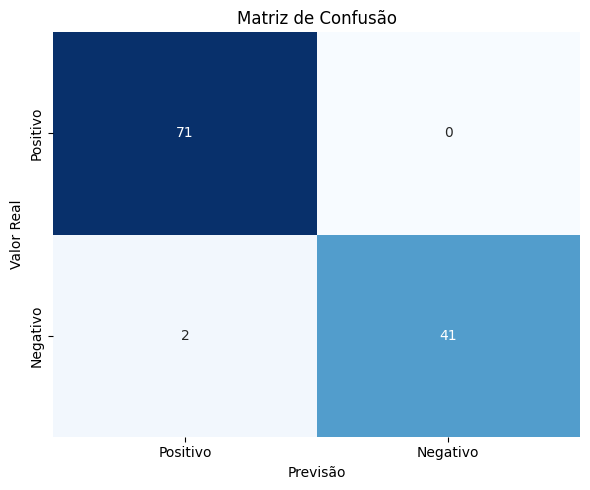

In [183]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Normalizando os dados
norm=Nomalizer()
norm.fit(X_train,y_train)
norm_Trx,norm_Try=norm.normalize(X_train,y_train)
norm_Tsx,norm_Tsy=norm.normalize(X_test,y_test)


# Treinando um modelo
model = LogisticClassifier()
model.fit(norm_Trx,y_train,n=9, reg=1, lr=0.1, epochs=100)

# Fazendo previsões
y_pred = model.predict(norm_Tsx)

# Contagem para de TP,FN,FP,TN para calcular metricas e matriz de confusão
TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test['y'][i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test['y'][i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test['y'][i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test['y'][i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(norm_Tsy)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [184]:
# Configurando o KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Para armazenar métricas de cada fold
mse_scores = []
acuracias =[]
revocacoes=[]
precisoes=[]
f1_scores=[]

# Loop pelos folds
for train_index, test_index in kf.split(x):
    # Dividindo os dados em treino e teste
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    # Normalizando os dados
    norm=Nomalizer()
    norm.fit(X_train,y_train)
    norm_Trx,norm_Try=norm.normalize(X_train,y_train)
    norm_Tsx,norm_Tsy=norm.normalize(X_test,y_test)


    # Treinando um modelo
    model = LogisticClassifier()
    model.fit(norm_Trx,norm_Try,n=1, reg=1, lr=0.001, epochs=50)

    # Fazendo previsões
    y_pred = model.predict(norm_Tsx)

    # Contagem para de TP,FN,FP,TN para calcular metricas e matriz de confusão
    TP = 0  # Verdadeiro Positivo
    FN = 0  # Falso Negativo
    FP = 0  # Falso Positivo
    TN = 0  # Verdadeiro Negativo

    indices = list(range(len(y_pred)))
    for i in indices:
        if y_test['y'][i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y_test['y'][i] == 0 and y_pred[i] == 0:
            TN += 1
        elif y_test['y'][i] == 0 and y_pred[i] == 1:
            FP += 1
        elif y_test['y'][i] == 1 and y_pred[i] == 0:
            FN += 1

    matriz_confusao = np.array([[TP, FN],
                                [FP, TN]])
    print("/////////////////////////////////////////////////")

    # Calculo da acuracia
    acuracia = (TP + TN) / len(norm_Tsy)
    print("acuracia do modelo: ",acuracia)
    acuracias.append(acuracia)

    # Calculo da revocação
    revocacao = TP / (TP + FN)
    revocacoes.append(revocacao)
    print("revocação do modelo: ",revocacao)

    # Calculando a precisão
    precisao = TP / (TP + FP) 
    precisoes.append(precisao)
    print("precisao do modelo: ",precisao)

    # Calculando f1-score
    f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
    f1_scores.append(f1_score)
    print("f1-score do modelo: ",f1_score)


/////////////////////////////////////////////////
acuracia do modelo:  0.9473684210526315
revocação do modelo:  0.975
precisao do modelo:  0.9512195121951219
f1-score do modelo:  0.9629629629629629
/////////////////////////////////////////////////
acuracia do modelo:  0.8245614035087719
revocação do modelo:  0.8709677419354839
precisao do modelo:  0.8181818181818182
f1-score do modelo:  0.84375
/////////////////////////////////////////////////
acuracia do modelo:  0.9122807017543859
revocação do modelo:  0.918918918918919
precisao do modelo:  0.9444444444444444
f1-score do modelo:  0.9315068493150684
/////////////////////////////////////////////////
acuracia do modelo:  0.9473684210526315
revocação do modelo:  0.975
precisao do modelo:  0.9512195121951219
f1-score do modelo:  0.9629629629629629
/////////////////////////////////////////////////
acuracia do modelo:  0.8421052631578947
revocação do modelo:  0.8974358974358975
precisao do modelo:  0.875
f1-score do modelo:  0.8860759493670

In [205]:

# Exibindo o resultado
print("/////////////////////////////////////////////////")
print("Metricas Acuracia:")
print("Acuracia médio:", np.mean(acuracias))
print("Desvio padrão Acuracia:", np.std(acuracias))
#print("Acuracia em cada fold:", acuracias)
print(" ")

print("Metricas Revocação:")
print("Revocação médio:", np.mean(revocacoes))
print("Desvio padrão Revocação:", np.std(revocacoes))
#print("Revocações em cada fold:", revocacoes)
print(" ")

print("Metricas Precisão:")
print("Precisão médio:", np.mean(precisoes))
print("Desvio padrão Precisão:", np.std(precisoes))
#print("Precisões em cada fold:", precisoes)
print(" ")

print("Metricas F1-score:")
print("F1-score médio:", np.mean(f1_scores))
print("Desvio padrão F1-score:", np.std(f1_scores))
#print("F1-scores em cada fold:", f1_scores)
print("/////////////////////////////////////////////////")

/////////////////////////////////////////////////
Metricas Acuracia:
Acuracia médio: 0.8839912280701755
Desvio padrão Acuracia: 0.04852837791028952
 
Metricas Revocação:
Revocação médio: 0.9354225348176961
Desvio padrão Revocação: 0.03682131581862817
 
Metricas Precisão:
Precisão médio: 0.8847500541820184
Desvio padrão Precisão: 0.07449830905049408
 
Metricas F1-score:
F1-score médio: 0.9073301239307314
Desvio padrão F1-score: 0.04306669777286206
/////////////////////////////////////////////////


# Questão 2

In [186]:
x=df_2flowers[['petal length (cm)','petal width (cm)']]
y=df_2flowers[['species']]

In [187]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [188]:
model = LogisticClassifier()
model.fit(X_train,y_train,n=1, reg=1, lr=0.001, epochs=50)

In [189]:
y_pred = model.predict(X_test)

/////////////////////////////////////////////////
acuracia do modelo:  1.0
revocação do modelo:  1.0
precisao do modelo:  1.0
f1-score do modelo:  1.0


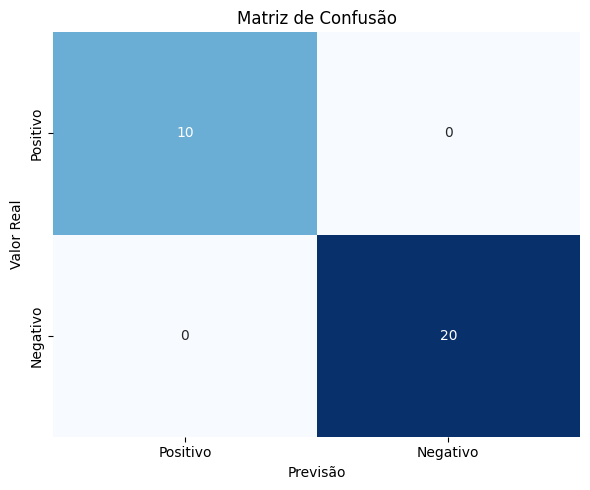

In [192]:
# Contagem para de TP,FN,FP,TN para calcular metricas e matriz de confusão
TP = 0  # Verdadeiro Positivo
FN = 0  # Falso Negativo
FP = 0  # Falso Positivo
TN = 0  # Verdadeiro Negativo


indices = list(range(len(y_pred)))
for i in indices:
    if y_test['species'][i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y_test['species'][i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y_test['species'][i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y_test['species'][i] == 1 and y_pred[i] == 0:
        FN += 1

matriz_confusao = np.array([[TP, FN],
                            [FP, TN]])
print("/////////////////////////////////////////////////")

# Calculo da acuracia
acuracia = (TP + TN) / len(y_test)
print("acuracia do modelo: ",acuracia)


# Calculo da revocação
revocacao = TP / (TP + FN)
print("revocação do modelo: ",revocacao)

# Calculando a precisão
precisao = TP / (TP + FP) 
print("precisao do modelo: ",precisao)

# Calculando f1-score
f1_score = 2 * (precisao * revocacao) / (precisao + revocacao)
print("f1-score do modelo: ",f1_score)

# Criar o gráfico
plt.figure(figsize=(6, 5))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configurações do gráfico
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsão")
ax.set_ylabel("Valor Real")

# Adicionando rótulos aos eixos
ax.xaxis.set_ticklabels(["Positivo", "Negativo"])
ax.yaxis.set_ticklabels(["Positivo", "Negativo"])

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [163]:
y_test['previsao']=y_pred
y_test

,species,previsao
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


In [125]:
# Criar o grid para plotar a superfície de decisão
x_arr = np.array(x) 
x_min, x_max = x_arr[:, 0].min() - 1, x_arr[:, 0].max() + 1
y_min, y_max = x_arr[:, 1].min() - 1, x_arr[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = pd.DataFrame({
    'petal length (cm)': xx.ravel(),
    'petal width (cm)': yy.ravel()
})

In [126]:
# Prever as classes no grid usando o modelo
grid['prediction'] = model.predict(grid)
# Transformar as previsões em formato de grade para visualização
Z = grid['prediction'].values.reshape(xx.shape)

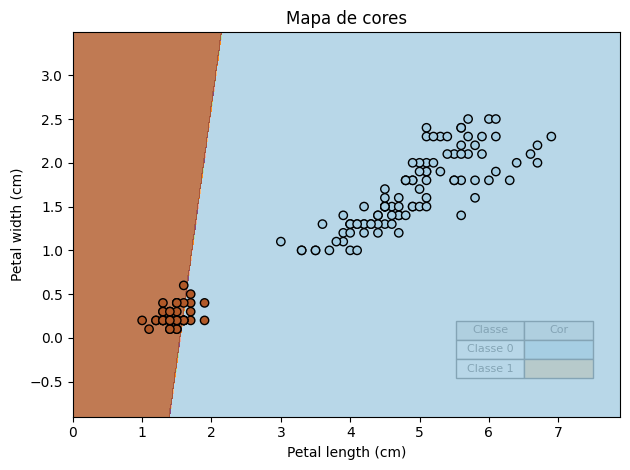

In [204]:
from matplotlib.table import Table
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Passar a variável y diretamente como a sequência de cores
plt.scatter(x_arr[:, 0], x_arr[:, 1], c=y.values, edgecolor='k', cmap=plt.cm.Paired)

classes = np.unique(y)
colors = [plt.cm.Paired(cls / len(classes)) for cls in classes]
labels = [f"Classe {cls}" for cls in classes]

# Criar a tabela no canto inferior direito

ax = plt.gca()

# Coordenadas da tabela (canto inferior direito)
table = Table(ax, bbox=[0.7, 0.1, 0.25, 0.15])  # [x, y, width, height]

# Largura e altura padrão das células
cell_width = 0.12
cell_height = 0.1

# Cabeçalhos da tabela
table.add_cell(0, 0, width=cell_width, height=cell_height, text="Classe", loc="center", facecolor="lightgray")
table.add_cell(0, 1, width=cell_width, height=cell_height, text="Cor", loc="center", facecolor="lightgray")

# Adicionar linhas com as cores e rótulos das classes
classes = np.unique(y)
for i, cls in enumerate(classes):
    color = plt.cm.Paired(cls / len(classes))  # Cor sólida
    table.add_cell(i + 1, 0, width=cell_width, height=cell_height, text=f"Classe {cls}", loc="center", facecolor="white")
    table.add_cell(i + 1, 1, width=cell_width, height=cell_height, text="", loc="center", facecolor=color)

# Adicionar a tabela ao gráfico
ax.add_table(table)

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Mapa de cores')
plt.tight_layout()
plt.show()